# STAT 305 Lab 10: Statistical Estimators

In [1]:
#!pip install symbulate

In [2]:
from symbulate import *
%matplotlib inline
from matplotlib import pyplot as plt

## Instructions

This lab provides a very brief introduction to statistical estimators, and how probability and simulation can be used to compare and evaluate statistical procedures.  There is no code to write and nothing to submit.  Just read the lab from start to finish, running the code provided and inspecting the output.  Discuss with your partner and ask if you have questions.  Refer to Handout 23 for related notes and details.

## Setup

Suppose we wish to estimate $p$, the probability that a baby is a girl, based on a sample of $n$ births. Let $X$ denote the number of babies in the sample that are girls.

As an example, suppose my sample consists of my 5 kids who from oldest to youngest are: 0, 1, 0, 1, 1, a.k.a., boy, girl, boy, girl, girl.  But different samples of size 5 will yield different data and hence different estimates of $p$.

The problem is: since $p$ is unknown we never know if any particular sample gives a good estimate of $p$.  But we can use probability and simulation to analyze the sampling and estimation *procedure* to see if it *tends to* produce good estimates.

While in practice $p$ is unknown, we can assume values for $p$ to run simulations and see what happens.  First assume $p=0.5$.  The following defines a probability space with outcomes corresponding to samples of size 5.

In [3]:
n = 5
p = 0.5

P = BoxModel([1, 0], probs = [p, 1 - p], size = n)

P.sim(3)

0,"(1, 0, 0, 1, 1)"
1,"(1, 0, 0, 0, 1)"
2,"(1, 0, 1, 0, 0)"


Now let $X$ be the number of girls.

In [4]:
X = RV(P, sum)
X.sim(3)

0,2
1,3
2,4


## Estimator 1: Sample proportion

First consider the estimator $T_1=X/n$, the sample proportion of girls.  For the sample of my kids, the observed value of this estimator is 3/5 = 0.6.  But the estimator is a statistic which will vary from sample to sample.  The following simulates the distribution of $T_1$ and approximates its mean and variance.

(0.5015200000000001, 0.05078968960000001)

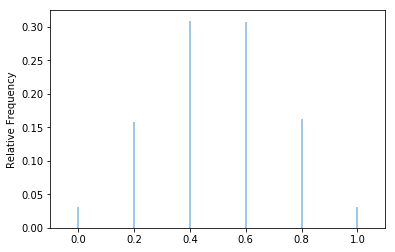

In [5]:
T1 = X / n

t1 = T1.sim(10000)
t1.plot()
plt.xlim(-0.1, 1.1) # fix plot scale for comparison
t1.mean(), t1.var()

**Thought question.** You should have gotten a simulated mean close to 0.5.  How do you interpret this mean as a long run average?

The simulation shows that over many samples the long run average value of  sample proportions is equal to the true population proportion (which was assumed to be 0.5). This agrees with the theory: When $p=0.5$ and $n=5$, $X$ has a Binomial(5, 0.5) distribution, so

$E(T_1) = E(X / 5) = E(X) / 5 = 5(0.5) / 5 = 0.5$.


The simulation also shows that the sample-to-sample variance of sample proportions is about 0.05.  This also agrees with the theory

$Var(T_1) = Var(X / 5) = Var(X) / 5^2 = 5(0.5)(1-0.5) / 5^2 = 0.5(1-0.5)/5 = 0.05$


Remember that $p$ is unknown, but the same theory for $p=0.5$ applies for general $p$. For a general $p$ and $n$, $X$ has a Binomial($n$, $p$) distribution so $E(X) = np$ and

$E(T_1) = E(X / n) = E(X) / n = np / n = p$.

Regardless of the value of $p$, over many samples $T_1$ does not systematically overestimate or underestimate $p$.  While the values of $T_1$ vary from sample-to-sample the sample proportions tend to be equal to the true population proportion on average over many samples, regardless of the value of $p$.  We say that $T_1$ is an **unbiased estimator** of $p$: $E(T_1)=p$ for *any* value of $p$.

We can also compute the variance of $T_1$ for a general $n$ and $p$. Since $X$ has a Binomial($n$, $p$) distribution, $Var(X) = np(1-p)$ and

$Var(T_1) = Var(X / n) = Var(X) / n^2 = np(1-p) / n^2 = p(1-p)/n$

The sample-to-sample variance of the sample proportion is a function of the true population proportion.  This function is plotted below; its maximum value of 0.05 is attained at $p=0.5$.

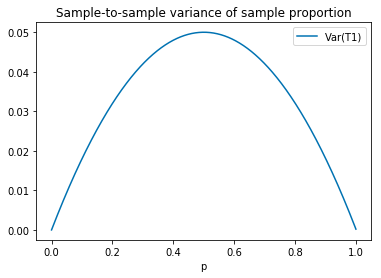

In [6]:
ps = [i / 1000 for i in range(0, 1000)]
varT1 = [p * (1 - p) / n for p in ps]
plt.plot(ps, varT1);
plt.legend(['Var(T1)']);
plt.xlabel('p');
plt.title('Sample-to-sample variance of sample proportion');

## Estimator 3: Just the first kid.

The sample proportion is a natural and intuitive estimator, but it's not the only possible estimator of $p$. Consider the estimator $T_3 = X_1$.  That is, $T_3$ is 1 if the first kid is a girl, and $T_3$ equals 0 if the first kid is a boy.  Since my first kid is a boy, for the sample of my kids the observed value of $T_3$ is 0.

**Thought questions.**

- Is $T_3$ an unbiased estimator of $p$?
- Which estimator do you prefer, $T_1$ or $T_3$? Why?
- Find $Var(T_3)$.  

$T_3$ is an unbiased estimator of $p$, but it's a pretty terrible estimator.  In particular, the variance is large: $T_3$ estimates that either $p$ is 1 or $p$ is 0 with no in between.  $Var(T_3) = p(1-p)$.  Regardless of the value of $p$, the variance of $T_3$ is greater than the variance of $T_1$ (see plot below).  When choosing between two unbiased estimators, the one with smaller variance is generally preferred.  So we would prefer $T_1$ to $T_3$.

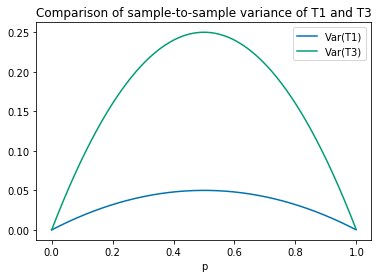

In [7]:
varT3 = [p * (1 - p)  for p in ps]

plt.plot(ps, varT1);
plt.plot(ps, varT3);
plt.legend(['Var(T1)', 'Var(T3)']);
plt.xlabel('p')
plt.title('Comparison of sample-to-sample variance of T1 and T3');

## Estimator 2: four more imaginary kids

Now consider the estimator $T_2=(X + 2) / (n + 4)$, which corresponds to adding 4 more imaginary kids, 2 girls and 2 boys, to the observed sample data.  For the sample of my kids, the observed value of this estimator is $(3 + 2)/(5+4) = 5/9 = 0.556$.  But the estimator is a statistic which will vary from sample to sample.  The following simulates the distribution of $T_2$ when $n=5$ and $p=0.5$.

(0.5007666666666666, 0.015293239382716052)

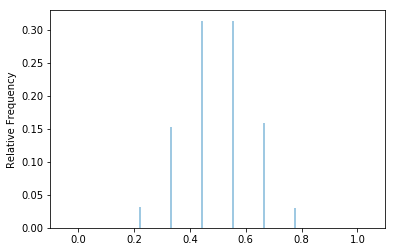

In [8]:
T2 = (X + 2) / (n + 4)

t2 = T2.sim(10000)
t2.plot()
plt.xlim(-0.1, 1.1);
t2.mean(), t2.var()

**Thought questions.**

- Is the simulated mean equal to $p=0.5$?
- Which estimator has less sample-to-sample variability, $T_1$ or $T_2$?

When $p=0.5$, $T_2$ does not systematically overestimate or underestimate $p=0.5$ on average over many samples.  But what about other values of $p$? For example $p=0.6$.

(0.5537555555555554, 0.015004167407407409)

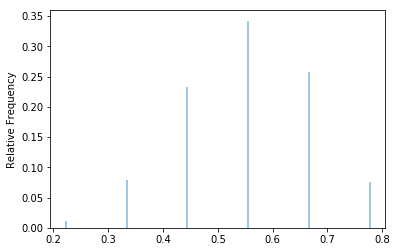

In [9]:
n = 5
p = 0.6

P = BoxModel([1, 0], probs = [p, 1 - p], size = n)
X = RV(P, sum)
T2 = (X + 2) / (n + 4)

t2 = T2.sim(10000)
t2.plot()
t2.mean(), t2.var()

**Thought question.** When $p=0.6$, does $T_2$ tend to overestimate or underestimate $p$?  By how much? Why does it over/under-estimate?

Now what about $p=0.4$?

(0.4423222222222223, 0.014473273950617286)

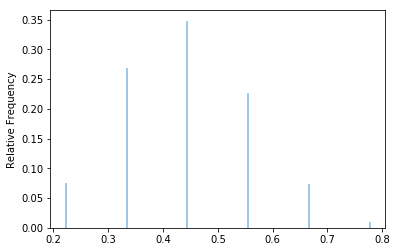

In [10]:
n = 5
p = 0.4

P = BoxModel([1, 0], probs = [p, 1 - p], size = n)
X = RV(P, sum)
T2 = (X + 2) / (n + 4)

t2 = T2.sim(10000)
t2.plot()
t2.mean(), t2.var()

**Thought question.** When $p=0.4$, does $T_2$ tend to overestimate or underestimate $p$? By how much? Why does it over/under-estimate?

**Thought question.** Is $T_2$ an unbiased estimator of $p$?

The simulations illustrate that $T_2$ is a **biased** estimator of $p$; for some values of $p$, on average over many samples $T_2$ has a tendency to systematically overestimate $p$ and for other values of $p$ on average over many samples $T_2$ has a tendency to systematically underestimates $p$.

We can use theory to find the expected value of $T_2$ for general $p$.

\begin{align}
E(T_2) & = E\left(\frac{X+2}{n+4}\right)\\
& = \frac{E(X)+2}{n+4}\\
& = \frac{np + 2}{n + 4}
\end{align}

Unless $p=0.5$, $E(T_2)\neq p$.

The **bias** of an estimator is a difference between its expected value and the parameter that it's estimating.  Note that bias is usually a function of the unknown value of the parameter.  (For an unbiased estimator, the bias is just a constant of 0.)

\begin{align}
bias(T_2) & = E(T_2) - p\\
& = \frac{np + 2}{n + 4} - p\\
& = \frac{2-4p}{n+4}
\end{align}

The estimator $T_2$ "pulls estimates toward 0.5", so $T_2$ tends to overestimate $p$ (positive bias) when $p<0.5$ and $T_2$ tends to underestimate $p$ (negative bias) when $p>0.5$.  And the bias is larger in magnitude when $p$ is farther from 0.5.

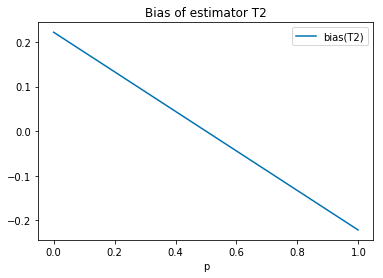

In [11]:
biasT2 = [(2 - 4 * p) / (n + 4) for p in ps]
plt.plot(ps, biasT2);
plt.legend(['bias(T2)']);
plt.xlabel('p')
plt.title('Bias of estimator T2');

## Comparison of $T_2$ and $T_3$

**Thought question.** We have seen that $T_2$ is biased but $T_3$ is not.  But which estimator do you prefer? Why?

Bias or lack thereof is one feature of an estimator, but not the only one.  In particular, sample-to-sample variability is an extremely important consideration.  Generally, estimators with smaller sample-to-sample variance are preferred.

The following derives the variance of $T_2$.  Note that $Var(T_2) < Var(T_3) = p(1-p)$.

\begin{align}
Var(T_2) & = Var\left(\frac{n}{n+4}T_1 + \frac{4}{n+4}(0.5)\right)\\
& = Var\left(\frac{n}{n+4}T_1\right) \\
& =  \left(\frac{n}{n+4}\right)^2 Var(T_1)\\
& = \left(\frac{n}{n+4}\right)^2\frac{p(1-p)}{n}\\
& = \frac{p(1-p)}{n + 8 + 16/n}
\end{align}

The **mean square error (MSE)** of an estimator is a combined measure of both its bias and sample-to-sample variance.

$MSE(T) = Var(T) + bias^2(T)$ 

The MSE is a function of the unknown parameter.

The following plot illustrates the squared bias, variance, and MSE of $T_2$ as functions of $p$.

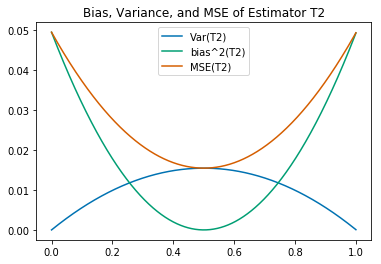

In [12]:
ps = [i / 1000 for i in range(0, 1000)]
squared_biasT2 = [((2 - 4 * p) / (n + 4)) ** 2 for p in ps]
varT2 = [p * (1 - p) / (n + 8 + 16 / n)  for p in ps]
mseT2 = [squared_biasT2[i] + varT2[i] for i in range(len(ps))]
plt.plot(ps, varT2);
plt.plot(ps, squared_biasT2);
plt.plot(ps, mseT2);
plt.legend(['Var(T2)', 'bias^2(T2)', 'MSE(T2)']);
plt.title('Bias, Variance, and MSE of Estimator T2');

The following plot compares the MSE of $T_2$ and $T_3$.  We see that while $T_2$ is biased and $T_3$ is unbiased, $T_2$ has smaller MSE unless the true value of $p$ is really close to 0 or 1.

Note that since an unbiased estimator has a constant bias of 0, the MSE of an unbiased estimator is equal to its variance.

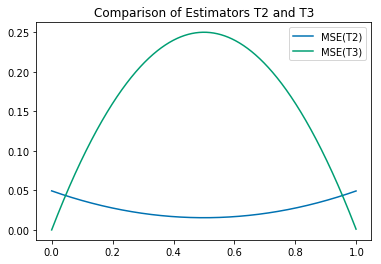

In [13]:
plt.plot(ps, mseT2);
plt.plot(ps, varT3);
plt.legend(['MSE(T2)', 'MSE(T3)']);
plt.title('Comparison of Estimators T2 and T3');

## Comparison of $T_1$ and $T_2$

The following compares the MSE of $T_1$ and $T_2$.

**Thought question.** Is either one uniformly better than the other?  What are some advantages/disadvantages of each?

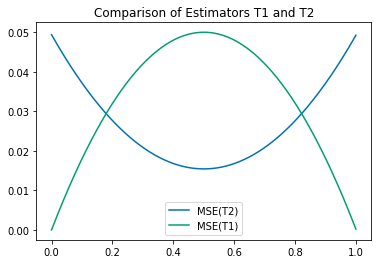

In [14]:
plt.plot(ps, mseT2);
plt.plot(ps, varT1);
plt.legend(['MSE(T2)', 'MSE(T1)']);
plt.title('Comparison of Estimators T1 and T2');

**Thought question.**  With your partner, summarize in a few bullet points the ideas introduced in this lab. Then compare with the summary below.

- A **parameter** is a number that summarizes or characterizes a population distribution.  In practice, the value of a parameter is unknown and must be estimated based on sample data.
- A **statistic** is a number that summarizes a random sample from a population.
- **A statistic is a *random variable*: the value of a statistic varies from sample to sample.**
- An **estimator** $T$ is a statistic that is used to estimate an unknown parameter $\theta$.
- An estimator can be evaluated based on its bias and variability
- The **bias** of an estimator is $bias(T) = E(T) - \theta$, a function of the value of $\theta$
- An **unbiased** estimator has zero bias: $T$ is unbiased if $E(T) = \theta$ for all $\theta$.  An unbiased estimator does not have a systematic tendency to underestimate or overestimate the parameter on average over many samples, regardless of the true parameter value.
- $Var(T)$ measures the sample-to-sample variance of an estimator.  Generally estimators with smaller sample-to-sample variance are preferred.
- The **mean square error (MSE)** of an estimator is a combined measure of its bias and sample-to-sample variability: $MSE(T) = Var(T) + bias^2(T)$, a function of the value of $\theta$.
- There are usually many "reasonable" estimators for a parameter.  It is rarely possible to find one that has the smallest MSE for *all* possible values of $\theta$.  Choosing an estimator often involves a tradeoff between bias and variability.